In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**"Разработка модели классификации патологий по снимкам"**

Кузьмин Олег 2024.01.17 - 2024.01.24 (07-я неделя).

  



### Техническое задание

Техническое Задание для проекта стажировки
1. Введение
Цель проекта - создание продукта с использованием искусственного интеллекта для диагностики и лечения заболеваний ВНЧС, с использованием методов машинного обучения и нейронных сетей.
2. Задачи проекта
2.1. Обработка и анализ КЛКТ и МРТ снимков
- С использованием библиотеки Pydicom, провести загрузку и обработку КЛКТ и МРТ снимков в формате DICOM.
- Применив модели машинного обучения и базу TensorFlow и Keras для выявления патологий челюстных костей на основе анализа данных снимков.
2.2. Создание системы классификации и фреймворка предсказания
- Сформировать модель классификации патологий, основанную на архитектуре сверточных нейронных сетей с использованием Keras.
- Разработать механизм определения геометрии патологий с использованием анализа изображений OpenCV.
2.3. Разработка системы представления результатов
- Создание простого веб-интерфейса с помощью FastAPI или развертывание телеграм-бота для взаимодействия пользователя с системой и получения результатов анализа КЛКТ и МРТ снимков.
2.4. Интеграция разработанной системы в рабочий процесс клиники
- Интегрировать разработанное решение в привычный рабочий процесс клиники с использованием библиотек для обслуживания модели.
3. Методы разметки
 - labelImg, Roboflow, CVAT AI, Labelbox, VGG Image Annotator (VIA), COCO Annotator, Supervise.ly,
4. Время и среда работы
- Длительность проекта: 3 месяца.
- Среда разработки: Google Colaboratory
5. Заключение
Разработанный продукт должен обеспечивать эффективную аналитику снимков для диагностики заболеваний ВНЧС и формировать дальнейший план действий для изготовления последнего элайнера, используя взаимодействие ИИ и человеческого специалиста.

Ссылка на ТЗ от клиники:
https://docs.google.com/presentation/d/17oEmE4xG3jhlg64gDHrHICy1_i2XjoUn/edit?usp=sharing&ouid=104431004874051483278&rtpof=true&sd=true

## Загружаем библиотеки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import export_text
import graphviz
import pickle
#from tf.keras import activations, softmax

## Читаем DS подготовленный Д.Уткиным

In [ ]:
# Укажим путь к файлу с данными на моем диске
way = '/content/drive/MyDrive/Stag_3/DF_csv_form.csv'
df_irsa = pd.read_csv(way, index_col=0)                                        # чтение данных из файла excel в pandas.DataFrame  ~,delimiter=';' по умолчанию ','
print(type(df_irsa))                                                                          # параметр index_col определяет столбец, который будет использоваться как индекс в таблице
print(df_irsa.shape)
li = df_irsa.columns.tolist()
print('len(li)', len(li))
df_irsa

<class 'pandas.core.frame.DataFrame'>
(379, 34)
len(li) 34


,name,comment,axial.left.anterior,axial.left.posterior,axial.left.medial,axial.left.lateral,axial.right.anterior,axial.right.posterior,axial.right.medial,axial.right.lateral,...,issue.medial.left,issue.medial.right,issue.compression.left,issue.compression.right,issue.distraction.left,issue.distraction.right,issue.distal.left,issue.distal.right,issue.mesial.left,issue.mesial.right
id,,,,,,,,,,,,,,,,,,,,,
1,Останькович В.В.,NaN,-1.0,-1.0,3.1,1.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
2,Самойлова Е.Г. 29.12.2021,NaN,-1.0,-1.0,1.7,2.3,-1.0,-1.0,2.0,2.3,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
3,Авакимова М.Н.,NaN,-1.0,-1.0,8.4,2.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,Авдеева С.В.,NaN,-1.0,-1.0,3.3,2.8,-1.0,-1.0,3.6,2.0,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN
5,Калинина З.П.,странный 0,-1.0,-1.0,3.1,0.1,-1.0,-1.0,2.6,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Васильчиков Б.Д.16.12.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,Козлобаева С.Н.14.12.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,Коптяева П.Г.26.05.2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Список столбцов


In [ ]:
df_irsa.comment.unique()

array([nan, 'странный 0', 'конфликт'], dtype=object)

In [ ]:
li  # { anterior:передний, superior:верхняя, posterior:задняя,  medial:медиальный, lateral:латеральный}

['name',
 'comment',
 'axial.left.anterior',
 'axial.left.posterior',
 'axial.left.medial',
 'axial.left.lateral',
 'axial.right.anterior',
 'axial.right.posterior',
 'axial.right.medial',
 'axial.right.lateral',
 'sagittal.left.anterior',
 'sagittal.left.superior',
 'sagittal.left.posterior',
 'sagittal.right.anterior',
 'sagittal.right.superior',
 'sagittal.right.posterior',
 'coronal.left.lateral',
 'coronal.left.medial',
 'coronal.left.superior',
 'coronal.right.lateral',
 'coronal.right.medial',
 'coronal.right.superior',
 'issue.lateral.left',
 'issue.lateral.right',
 'issue.medial.left',
 'issue.medial.right',
 'issue.compression.left',
 'issue.compression.right',
 'issue.distraction.left',
 'issue.distraction.right',
 'issue.distal.left',
 'issue.distal.right',
 'issue.mesial.left',
 'issue.mesial.right']

### Формирую df только для sagittal проекции. Замеры правая и левая сторона

In [ ]:
df_sagittal = (df_irsa.iloc[:, [10,11,12,13,14,15]]).copy()   # достаем из df столбци с измерениями только в sagittal проекции
print(df_sagittal.shape)
li_sagittal = df_sagittal.columns.tolist()
print('len(li_sagittal)', len(li_sagittal))
df_sagittal

(379, 6)
len(li_sagittal) 6


,sagittal.left.anterior,sagittal.left.superior,sagittal.left.posterior,sagittal.right.anterior,sagittal.right.superior,sagittal.right.posterior
id,,,,,,
1,2.3,2.9,1.6,2.3,3.0,1.4
2,2.2,2.1,1.6,2.8,2.4,1.9
3,2.9,4.2,3.7,3.6,4.2,2.7
4,3.1,2.5,3.3,3.1,2.7,2.2
5,1.8,4.1,1.5,2.6,4.5,3.5
...,...,...,...,...,...,...
377,NaN,NaN,NaN,NaN,NaN,NaN
378,NaN,NaN,NaN,NaN,NaN,NaN
379,NaN,NaN,NaN,NaN,NaN,NaN


Смотрим статистику по столбцам

In [ ]:
# df_sagittal.count()
df_sagittal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 1 to 381
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sagittal.left.anterior    288 non-null    float64
 1   sagittal.left.superior    288 non-null    float64
 2   sagittal.left.posterior   288 non-null    float64
 3   sagittal.right.anterior   284 non-null    float64
 4   sagittal.right.superior   284 non-null    float64
 5   sagittal.right.posterior  284 non-null    float64
dtypes: float64(6)
memory usage: 20.7 KB


Чистим DF. Удаляем построчно если есть хотя бы одна ячейка пустая

In [ ]:
df_sagittal_any = (df_sagittal.dropna(axis=0, how='any')).copy()
df_sagittal_any
print(df_sagittal_any.shape)
li_sagittal_any = df_sagittal_any.columns.tolist()
print('len(li_sagittal_any)', len(li_sagittal_any))
df_sagittal_any

(282, 6)
len(li_sagittal_any) 6


,sagittal.left.anterior,sagittal.left.superior,sagittal.left.posterior,sagittal.right.anterior,sagittal.right.superior,sagittal.right.posterior
id,,,,,,
1,2.3,2.9,1.6,2.3,3.0,1.4
2,2.2,2.1,1.6,2.8,2.4,1.9
3,2.9,4.2,3.7,3.6,4.2,2.7
4,3.1,2.5,3.3,3.1,2.7,2.2
5,1.8,4.1,1.5,2.6,4.5,3.5
...,...,...,...,...,...,...
295,2.1,2.7,2.8,1.5,2.2,3.1
296,1.1,5.8,3.6,1.3,4.9,3.0
297,1.7,1.7,1.0,1.0,4.7,5.3


In [ ]:
df_sagittal_any.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 1 to 300
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sagittal.left.anterior    282 non-null    float64
 1   sagittal.left.superior    282 non-null    float64
 2   sagittal.left.posterior   282 non-null    float64
 3   sagittal.right.anterior   282 non-null    float64
 4   sagittal.right.superior   282 non-null    float64
 5   sagittal.right.posterior  282 non-null    float64
dtypes: float64(6)
memory usage: 15.4 KB


### Графический анализ информации по

In [ ]:
# подгрузим графические приложения
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

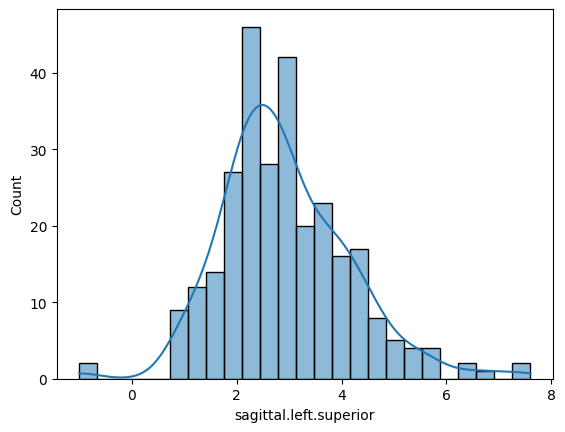

In [ ]:
sns.histplot(df_sagittal_any.iloc[:,2], bins=25, kde=True)
plt.show()

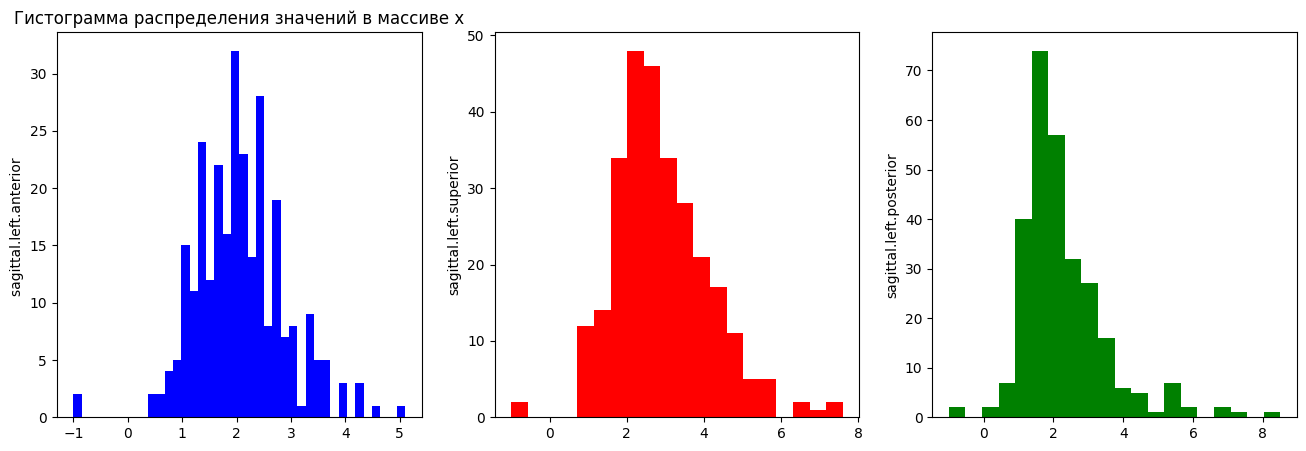

In [ ]:
plt.figure(1, figsize=(16, 5))

plt.subplot(131) # Таблица 1 на 3, работаем с графиком в ячейке 1
plt.title('Гистограмма распределения значений в массиве х')
plt.hist(df_sagittal_any.iloc[:,1], bins=40, color='b', linewidth = 1) # параметр bins отвечает за количество подгрупп, в которые объединяются данные
plt.ylabel('sagittal.left.anterior ')

plt.subplot(132) # Таблица 1 на 3, работаем с графиков в ячейке 2
plt.hist(df_sagittal_any.iloc[:,2], bins=20, color='r', linewidth = 1) # параметр bins отвечает за количество подгрупп, в которые объединяются данные
plt.ylabel('sagittal.left.superior')

plt.subplot(133) # Таблица 1 на 3, работаем с графиком в ячейке 3
plt.hist(df_sagittal_any.iloc[:,3], bins=20, color='g', linewidth = 1) # параметр bins отвечает за количество подгрупп, в которые объединяются данные
plt.ylabel('sagittal.left.posterior')

plt.show()

## После обучения модель можно использовать для прогнозирования класса образцов:

### Какие данные мы будем подавать в модель для предсказания диагноза?

Для сагиттальной проекции существует три вида измерений -  { anterior : **передний**, superior : **верхний**, posterior : **задний** }

Они являются реальными, полученными в результате графического или с помощью ИИ анализа.

Вторым видом подаваемых в модель данных, являются производные параметры, полученные путем различных математических манипуляций с исходными данными. Перечень приизводных переменных с пояснением методики их расчета приведен ниже.

In [ ]:
# список_производных_переменных = ['Σ/2 / Lc^', 'Σ/2', 'Δ<', '%', ' Lc < /  Lc ^ ', ' Lc > /  Lc ^ ', 'Σ(3)']
# расчетные переменные
~ Σ(2)       # сумма 2-х горизонтальных измерений
~ Σ/2        # среднее горизонтальное измерение (сумма 2-х горизонтальных измерений / 2 (деленныя на два))
~ Δ<         # дисперсия - модуль разности среднего и одного из горизонтальных размеров (справа и слева она равна, знак разный)
~ %          # относительное отклонение - модуль дисперсии деленной на передний (лицевой) размер
~ Σ(3)       # сумма 3-х измерений

# соотношения размеров
~ Σ/2 / Lc^      # отношение среднее горизонтальное измерение / верхний замер
~ Lc < /  Lc ^   # отношение (лицевой) размер    / верхний замер
~ Lc > /  Lc ^   # отношение (затылочный) размер / верхний замер


### Генерируем производные данные

In [ ]:
# преобразуем в numpy массив типа float
x_data = df_sagittal_any.astype(np.float32).to_numpy()
print(x_data.shape)
print(type(x_data))
print(x_data[23,:])
x_TEST_left  = x_data[23, :3]
print('x_TEST_left ', x_TEST_left)
x_TEST_right = x_data[23, 3:]
print('x_TEST_right', x_TEST_right)

(282, 6)
<class 'numpy.ndarray'>
[2.  3.6 2.5 1.4 2.8 2.5]
x_TEST_left  [2.  3.6 2.5]
x_TEST_right [1.4 2.8 2.5]


In [ ]:
# NAMPY
def generator_derivativ (x_data, n ):
  '''   '''
  x_data = x_data
  i = n
  print(x_data.shape, 'Пациент', i)
  derivativ_list = []                                           # создадим чистый лист для производных переменных (обязательно соблюсти последовательность)
  x_TEST_left  = x_data[i, :3]
  print('x_TEST_left ', x_TEST_left)

  anterior  = x_TEST_left[0]                                    # лицевой размер
  superior  = x_TEST_left[1]                                    # верхнее измерение
  posterior = x_TEST_left[2]                                    # затылочный размер
  #print(anterior,superior, posterior)

  gorizont_sum  = anterior + posterior                          # сумма 2-х горизонтальных измерений
  gorizont_sr   = (anterior + posterior) / 2                    # среднее горизонтальное измерение (сумма 2-х горизонтальных измерений / 2 (деленныя на два))
  dispersia     = abs(gorizont_sr - anterior)                   # дисперсия - модуль разности среднего и одного из горизонтальных размеров (справа и слева она равна, знак разный)
  dispersia_otn = abs(dispersia / anterior)                     # относительное отклонение - модуль дисперсии деленной на передний (лицевой) размер
# dispersia_otn = abs(dispersia / posterior)                    # относительное отклонение - модуль дисперсии деленной на задний (затылочный) размер
  all_sum       = anterior + posterior + superior               # сумма 3-х измерений

# соотношения размеров
  ratio_1 = gorizont_sr / superior                              # отношение среднее горизонтальное измерение / верхний замер
  ratio_2 = anterior    / superior                              # отношение (лицевой) размер    / верхний замер
  ratio_3 = posterior   / superior                              # отношение (затылочный) размер / верхний замер

# запишем все производные переменные в лист, соблюдая последовательность:
# список_производных_переменных = ['Σ/2 / Lc^', 'Σ/2', 'Δ<', '%', ' Lc < /  Lc ^ ', ' Lc > /  Lc ^ ', 'Σ(3)']

# добавляем в вектор x_train результаты измерений
  derivativ_list.append(anterior)
  derivativ_list.append(superior)
  derivativ_list.append(posterior)

# добавляем в вектор x_train значения производных переменных
  derivativ_list.append(ratio_1)
  derivativ_list.append(gorizont_sr)
  derivativ_list.append(dispersia)
  derivativ_list.append(dispersia_otn)
  derivativ_list.append(ratio_2)
  derivativ_list.append(ratio_3)
  derivativ_list.append(all_sum)

  #print('Проверим кол-во переменных (должно быть 10)', len(derivativ_list))
  print('derivativ_list', derivativ_list)

  return derivativ_list

## Загрузка обученной на прошлом этапе модели "Дерева решений"

из файла pickle_model.pk (Load from file)

In [ ]:
with open('/content/drive/MyDrive/Stag_3/pickle_model.pkl', 'rb') as file:
  pickle_model = pickle.load(file)

In [ ]:
print(type(pickle_model))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>


## Классификации исходных значений

In [ ]:
# Список классов по алфавиту
klass_list = ['distal', 'distr', 'komp', 'mezial', 'norm']
klass_list

['distal', 'distr', 'komp', 'mezial', 'norm']

In [ ]:
x_TEST_left_derivativ = generator_derivativ(x_data,12)
type(x_TEST_left_derivativ)

# После подбора модель можно использовать для прогнозирования класса образцов:
#pr = np.array([3.7,1.9,5.6,0.50,2.80,-0.90,-0.24,0.66,0.34,11.2])
#pr = np.array([1.8,7.4,7.6,0.61,4.60,2.80,1.56,0.24,0.97,16.80])
pr = np.array(x_TEST_left_derivativ)
#print(pr.shape)
pr = pr.reshape(1,-1)
#print(pr.shape)

# В качестве альтернативы выводу определенного класса можно предсказать вероятность каждого класса,
# которая представляет собой долю обучающих выборок класса в листе:
#pr = np.array([2.6, 5.5, 4.6])
#print(pr.shape)
#pr = pr.reshape(1,-1)
#print(pr.shape)

pred = pickle_model.predict_proba (pr) # можно предсказать вероятность каждого класса
print(pred)
idx = np.argmax(pred)
idx
print('Диагноз', klass_list[idx] )

(282, 6) Пациент 12
x_TEST_left  [2.4 3.5 2.6]
derivativ_list [2.4, 3.5, 2.6, 0.7142857142857143, 2.5, 0.09999990463256836, 0.041666625274553885, 0.6857143, 0.7428571, 8.5]
[[0. 0. 0. 0. 1.]]
Диагноз norm
